In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from raindrop.config import cfg
from raindrop.dropgenerator import generate_label, generateDrops


def see_plot(pict, color='gray', size=(5,5), title=''):
    plt.figure(figsize=size)
    plt.imshow(pict, cmap=color)
    plt.title(title)
    plt.xticks()
    plt.show()

    
def synt_gereration(real_img_fullpath, real_msk_fullpath, cfg, verbose=False):
    
    img = cv2.imread(real_img_fullpath)[:,:,::-1]
    msk = cv2.imread(real_msk_fullpath)[:,:,::-1]
    (h, w, c) = img.shape

    if verbose:
        mrg = img.copy()
        mrg[:,:,0] = mrg[:,:,0]//5*4+msk[:,:,0]//5
        see_plot(np.concatenate([img,msk,mrg],axis=1), size=(20,20), title='REAL image-mask-merged')
    
    # main synt generation
    List_of_Drops, label_map  = generate_label(h, w, cfg)
    synt_img, _, synt_msk = generateDrops(real_img_fullpath, cfg, List_of_Drops)
    
    # pill-image to numpy-image
    synt_img = np.array(synt_img)
    synt_msk = np.array(synt_msk)
    
    # почему-то иногда генерируется маска (h,w,3), но в основном - (h,w)
    if len(synt_msk.shape)==3: 
        synt_msk = synt_msk[:,:,0]
    synt_msk = np.stack((synt_msk,)*3, axis=-1)
    
    # совмещение реальной маски и синтетической
    # (чтобы синтетику можно было генерить и на грязных кадрах)
    synt_msk = (((msk>0).astype(int)+(synt_msk>0).astype(int))>0).astype(np.uint8)*255
    
    if verbose:
        merged = synt_img.copy()
        merged[:,:,0] = merged[:,:,0]//5*4+synt_msk[:,:,0]//5
        for_plot = np.concatenate([synt_img,synt_msk,merged],axis=1)
        see_plot(for_plot, size=(20,20), title=f'SYNT image-mask-merged')
        
    return synt_img,synt_msk

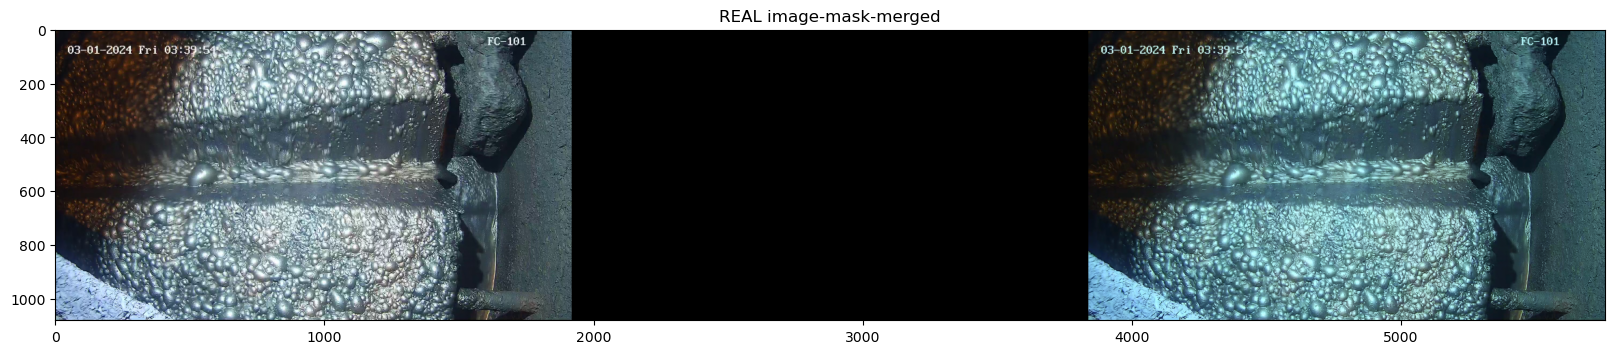

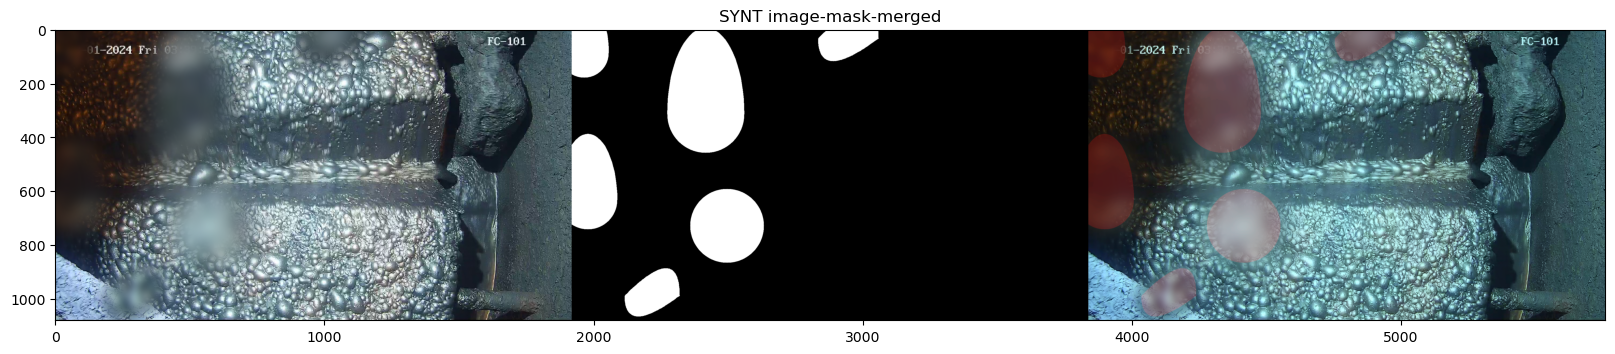

True

In [5]:
real_img_fullpath = 'C:/.../open_img/1709232001_0.jpg'
real_msk_fullpath = 'C:/.../open_msk/1709232001_0.png'

synt_img,synt_msk = synt_gereration(real_img_fullpath, real_msk_fullpath, cfg, verbose=True)
cv2.imwrite('new_synt_img1.jpg', synt_img[:,:,::-1])
cv2.imwrite('new_synt_msk1.png', synt_msk[:,:,::-1])

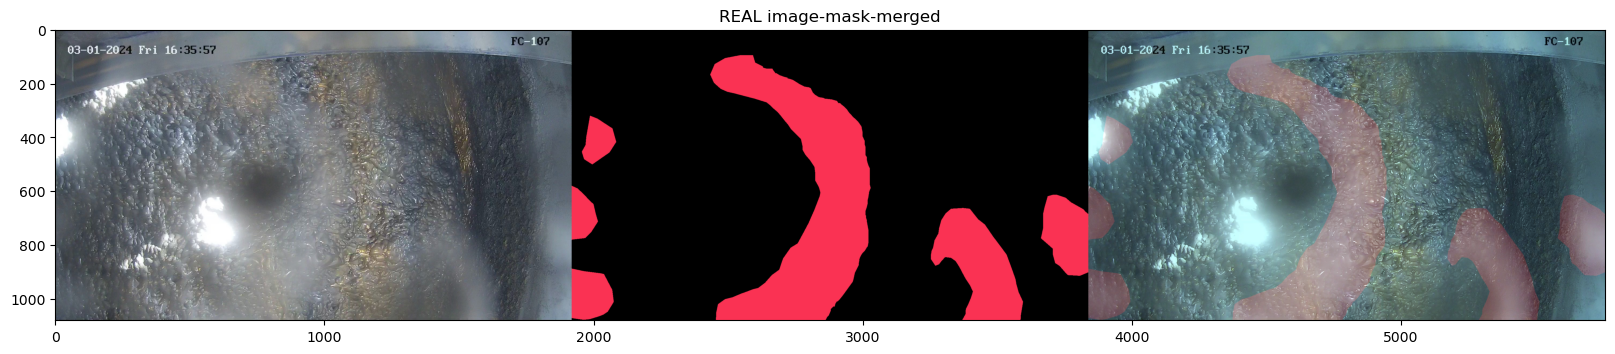

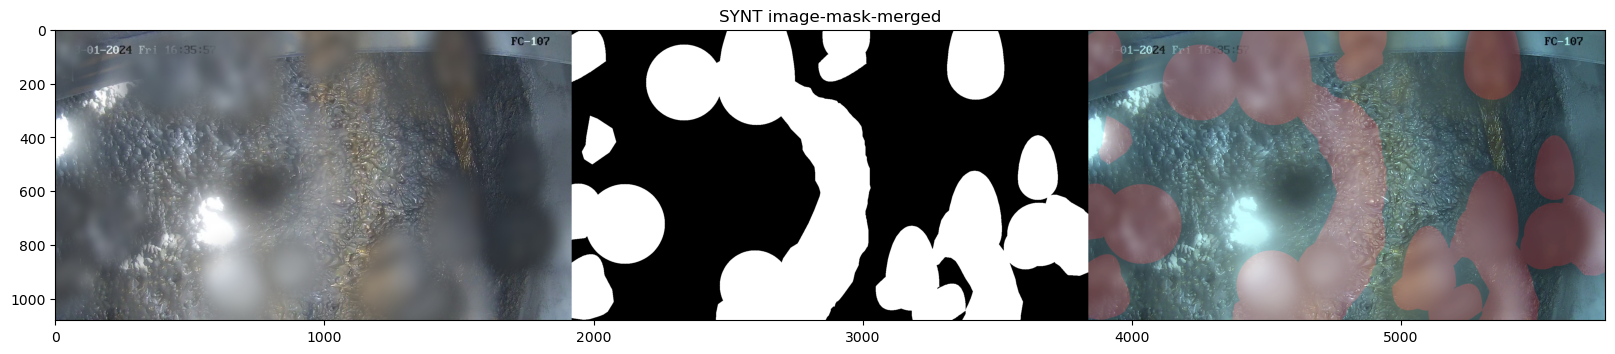

True

In [7]:
real_img_fullpath = 'C:/.../cv_open_dataset/open_img/1709278599_0.jpg'
real_msk_fullpath = 'C:/.../cv_open_dataset/open_msk/1709278599_0.png'

synt_img,synt_msk = synt_gereration(real_img_fullpath, real_msk_fullpath, cfg, verbose=True)
cv2.imwrite('new_synt_img2.jpg', synt_img[:,:,::-1])
cv2.imwrite('new_synt_msk2.png', synt_msk[:,:,::-1])